In [1]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=7816)#n_redundant冗余特征数

In [2]:
type(X)

numpy.ndarray

Text(0, 0.5, 'y values')

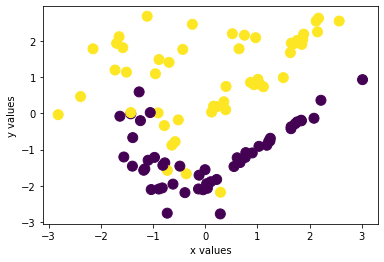

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

In [4]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [5]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 - 1

In [6]:
y

array([-1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1])

In [7]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import cv2
svm = cv2.ml.SVM_create()

In [9]:
svm.setKernel(cv2.ml.SVM_LINEAR)

In [10]:
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [11]:
_, y_pred = svm.predict(X_test)

In [12]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

In [13]:
def plot_decision_boundary(svm, X_test, y_test):
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    h = 0.02
    #np.meshgrid生成网格数据，方便后面绘制等高线的
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                  yy.ravel().astype(np.float32)]
    #np.c_按行连接两个矩阵，注意这里xx，yy视作一维的列向量，故链接后变成（n，2）的矩阵
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    #plt.contourf在网格数据上通过添加z值来绘制等高线
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

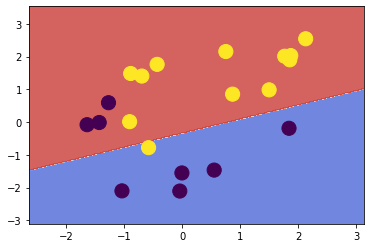

In [14]:
plot_decision_boundary(svm, X_test, y_test)

In [16]:
kernels = [cv2.ml.SVM_LINEAR, cv2.ml.SVM_INTER, cv2.ml.SVM_SIGMOID, cv2.ml.SVM_RBF]

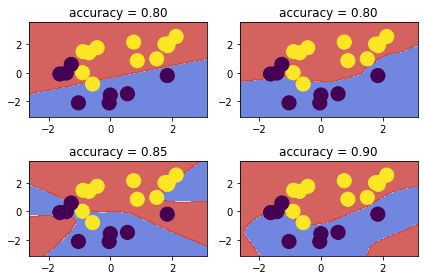

In [26]:
for idx, kernel in enumerate(kernels):
    svm = cv2.ml.SVM_create()
    svm.setKernel(kernel)
    svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    _, y_pred = svm.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    plt.subplot(2, 2, idx + 1)
    plot_decision_boundary(svm, X_test, y_test)
    plt.title('accuracy = %.2f' % accuracy)
    plt.tight_layout()#自动调整子图间距